In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
import mysql.connector

In [ ]:
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="vuduc2001",
  database="shopeeproduct",
  port = 3307
)
mycursor = mydb.cursor()
sql = "SELECT * FROM productshopeedetail "
mycursor.execute(sql)
result= mycursor.fetchall()
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('Shopee')\
        .getOrCreate()
productSchema = StructType() \
                    	.add("url", "string")\
                    	.add("name", "string")\
                    	.add("price_before_discount", "string")\
                    	.add("price_after_discount", "string")\
                        .add("position", "string")\
                        .add("sold", "string")\
                        .add("rate", "string")\
                        .add("type", "string")\
                        .add("time", "timestamp")\
                        .add("feedback", "string")\
                        .add("id", "integer")\
                        .add("discount", "string")\
data=spark.read.csv("hdfs://localhost:9000/shopeeProduct.csv",schema=productSchema)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = data.toPandas()
# print(df)

                                                     url  \
0      https://shopee.vn/Tee-basic-ss1-CREWZ-%C3%A1o-...   
1      https://shopee.vn/%C3%81o-kho%C3%A1c-bomber-KH...   
2      https://shopee.vn/Nh%E1%BA%ABn-Th%C3%A9p-Titan...   
3      https://shopee.vn/%C3%81o-kho%C3%A1c-th%E1%BB%...   
4      https://shopee.vn/%C3%81o-s%C6%A1-mi-basic-ch%...   
...                                                  ...   
30468  https://www.lazada.vn/products/dong-ho-thong-m...   
30469  https://www.lazada.vn/products/dong-ho-thong-m...   
30470  https://www.lazada.vn/products/galaxy-watch-5-...   
30471  https://www.lazada.vn/products/dong-ho-thong-m...   
30472  https://www.lazada.vn/products/thay-duoc-hinh-...   

                                             productname pricebeforediscount  \
0      Tee basic ss1 CREWZ áo thun tay lỡ unisex Loca...             159.000   
1      Áo khoác bomber KHN1, Áo hoodies nhung tăm for...             238.000   
2      Nhẫn Thép Titan Bề Mặt Tráng Gươ

In [ ]:
# in ra các ngành hàng và vị trí bán hàng
category = df.category.unique()
position = df.position.unique()
countPrint = 0
print('category')
for i in range(len(category)):
  if(countPrint<5):
    countPrint+=1;
    print(str(i) +':'+str(category[i]),end ="\t")
  else:
     print(str(i) +':'+str(category[i]))
     countPrint = 0
print("\n")
countPrint = 0
print('position')
for i in range(len(position)):
  if(countPrint<5):
    countPrint+=1
    print(str(i) +':'+str(position[i]),end ="\t")
  else:
    countPrint=0
    print(str(i) +':'+str(position[i]),)
# print(category)
# print(position)
# for ind in df.index:
#   print(df['url'][ind])

category
0:Thời Trang Nam	1:Phụ Kiện & Trang Sức Nữ	2:Nhà Cửa & Đời Sống	3:Thể Thao & Du Lịch	4:Máy Tính & Laptop	5:Bách Hóa Online
6:Thời Trang Nữ	7:Sắc Đẹp	8:Ô Tô & Xe Máy & Xe Đạp	9:Điện Thoại & Phụ Kiện	10:Đồng hồ thông minh	

position
0:Hà Nội	1:Nước ngoài	2:Thái Nguyên	3:Hưng Yên	4:Hải Dương	5:TP.HCM
6:Bắc Ninh	7:Nam Định	8:Thái Bình	9:Bà Rịa Vũng Tàu	10:Quảng Ninh	11:Nghệ An
12:Đồng Nai	13:Đắk Lắk	14:Vĩnh Long	15:Ninh Bình	16:Bắc Giang	17:An Giang
18:Đà Nẵng	19:Quảng Nam	20:Lạng Sơn	21:Kon Tum	22:Cao Bằng	23:Hà Tĩnh
24:Cần Thơ	25:Tây Ninh	26:Sóc Trăng	27:Bình Dương	28:Thanh Hóa	29:Vĩnh Phúc
30:Tuyên Quang	31:Bến Tre	32:Phú Thọ	33:Kiên Giang	34:Lâm Đồng	35:Hải Phòng
36:Đồng Tháp	37:Cà Mau	38:Khánh Hòa	39:Quảng Ngãi	40:Điện Biên	41:Bình Thuận
42:Long An	43:Bình Định	44:Thừa Thiên Huế	45:Sơn La	46:Hòa Bình	47:Gia Lai
48:Lào Cai	49:Đắk Nông	50:Yên Bái	51:Bình Phước	52:Trà Vinh	53:Ninh Thuận
54:Hà Nam	55:Quảng Trị	56:Phú Yên	57:Bạc Liêu	58:Hậu Giang	59:Quảng Bình
60:Hà Giang	61:Tiền 

In [ ]:
#chuyển đổi ngành hàng và vị trí sang id tương ứng
for ind in df.index:
  cate = np.where(category==df['category'][ind])[0][0]
  pos = np.where(position == df['position'][ind])[0][0]
  df['category'][ind] = cate
  df['position'][ind] = pos
  # print(cate,pos)
  # break
  

<ipython-input-5-38bee928f860>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'][ind] = cate
<ipython-input-5-38bee928f860>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'][ind] = pos


In [ ]:
#thêm cột tính score cho từng sản phẩm
# listScore = np.array([])
# listScoreFeedback = np.array([])
for ind in df.index:
  # print(type(df["priceafterdiscount"]))
  df["priceafterdiscount"][ind] = str(df["priceafterdiscount"][ind]).replace(".","")
  # score = int(df["priceafterdiscount"][ind])*(df["sold"][ind]+df["feedback"][ind])/1000000
  # listScore  = np.append(listScore,score)
  # print(score)
  # break
# print(listScore)

<ipython-input-6-53565359efae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["priceafterdiscount"][ind] = str(df["priceafterdiscount"][ind]).replace(".","")


In [ ]:
#thêm côt score
# df['score'] = listScore.tolist()
# max_score  = np.max(listScore)
# print(max_score)
# print(df)

133825.5
                                                     url  \
0      https://shopee.vn/Tee-basic-ss1-CREWZ-%C3%A1o-...   
1      https://shopee.vn/%C3%81o-kho%C3%A1c-bomber-KH...   
2      https://shopee.vn/Nh%E1%BA%ABn-Th%C3%A9p-Titan...   
3      https://shopee.vn/%C3%81o-kho%C3%A1c-th%E1%BB%...   
4      https://shopee.vn/%C3%81o-s%C6%A1-mi-basic-ch%...   
...                                                  ...   
30468  https://www.lazada.vn/products/dong-ho-thong-m...   
30469  https://www.lazada.vn/products/dong-ho-thong-m...   
30470  https://www.lazada.vn/products/galaxy-watch-5-...   
30471  https://www.lazada.vn/products/dong-ho-thong-m...   
30472  https://www.lazada.vn/products/thay-duoc-hinh-...   

                                             productname pricebeforediscount  \
0      Tee basic ss1 CREWZ áo thun tay lỡ unisex Loca...             159.000   
1      Áo khoác bomber KHN1, Áo hoodies nhung tăm for...             238.000   
2      Nhẫn Thép Titan Bề Mặt 

In [ ]:
dfHeatmap = df.groupby(['position','category']).size().reset_index(name='count')
dfSold = df[["position","category","sold","rating","feedback","discount"]].groupby(['position','category']).median().reset_index()
print(dfSold)

     position  category    sold  rating  feedback  discount
0           0         0   169.0    4.90      41.0      38.0
1           0         1    87.0    5.00      19.0      26.0
2           0         2    73.0    5.00      12.0      15.0
3           0         3   204.5    4.90      38.0      25.0
4           0         4    78.0    4.90      20.0      23.0
..        ...       ...     ...     ...       ...       ...
369        63         8    13.0    4.45       4.0       0.0
370        64         0    27.0    4.80      23.0      39.0
371        64         4    25.0    4.80       8.0       2.0
372        64         6    57.0    4.75      12.0      57.0
373        64        10  2866.0    4.70     548.0      44.0

[374 rows x 6 columns]


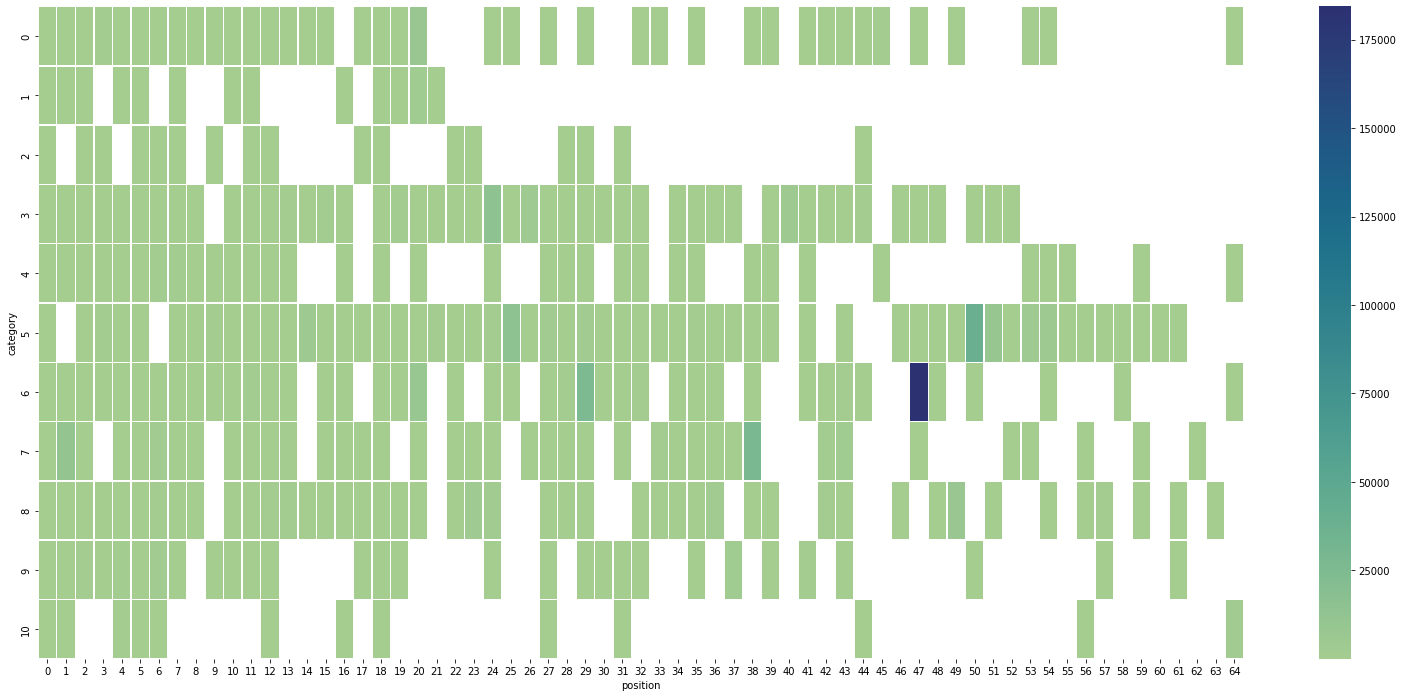

In [ ]:
# heatmap  thể hiện số  lượng hàng bán được theo  từng ngành hàng, khu vực
fig, ax = plt.subplots(figsize=(27,12))    
dataSold = dfSold.pivot(index='category', columns='position', values='sold')
heatmapSold = sns.heatmap(data=dataSold,linewidth=.5,ax=ax,cmap="crest")

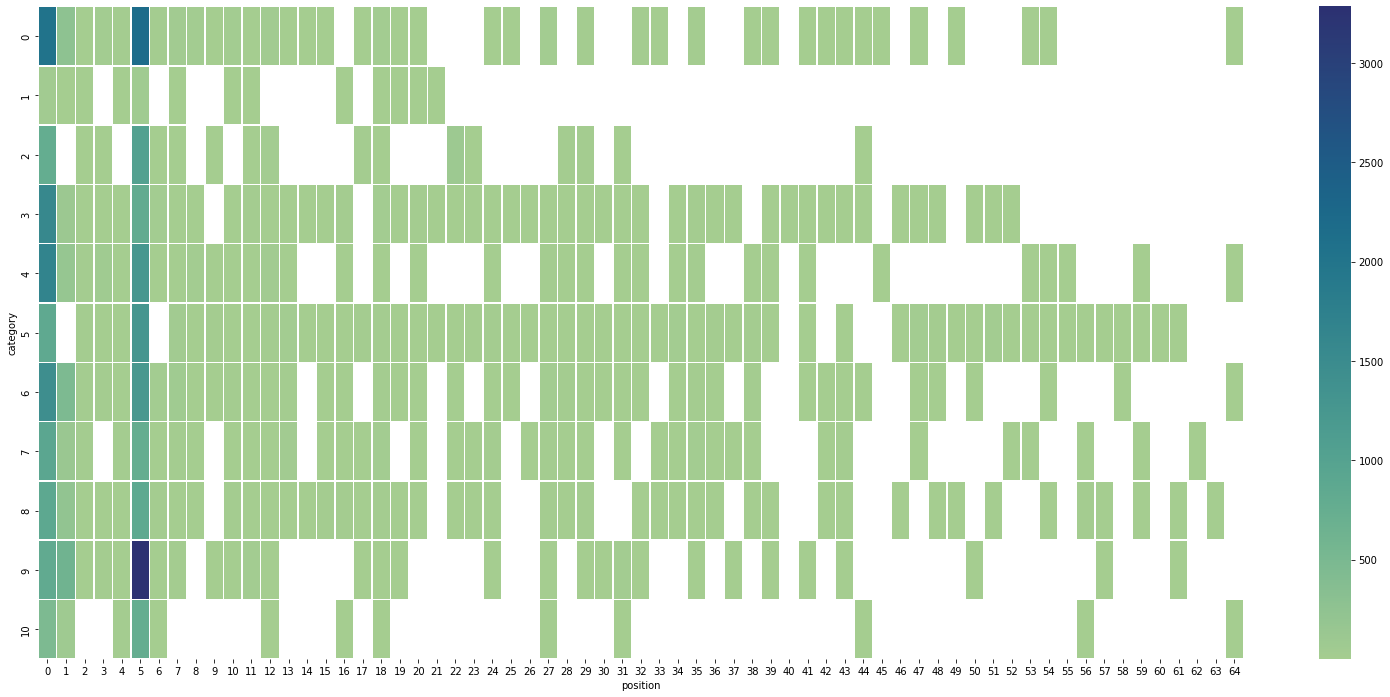

In [ ]:
#heatmap thể hiện số  lượng mặt hàng theo từng ngảnh hàng, khu  vực
figB, axB = plt.subplots(figsize=(27,12))  
data = dfHeatmap.pivot(index='category', columns='position', values='count')
heatmap = sns.heatmap(data=data,linewidth=.5,ax=axB,cmap="crest")
# heatmapNumberOfItem = sns.heatmap(data=dataSold,linewidth=.5,ax=ax,cmap="crest")

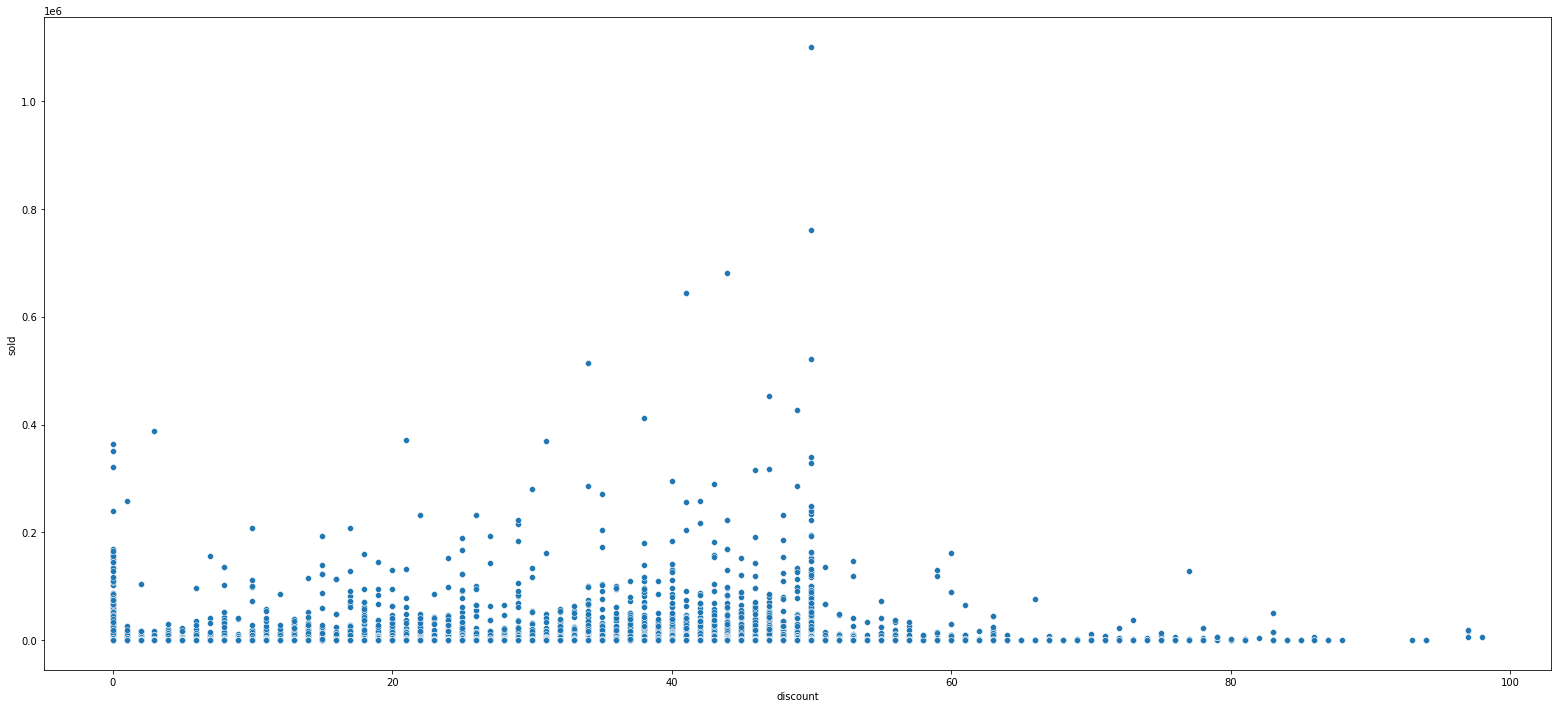

In [ ]:
#biểu đồ thể hiện mối quan hệ giữa discount và số lượng bán được
# dataPriceSold = df[["priceafterdiscount","sold"]]
figPS, axPS = plt.subplots(figsize=(27,12)) 
sns.scatterplot(x='discount',y='sold', data=df,ax=axPS)

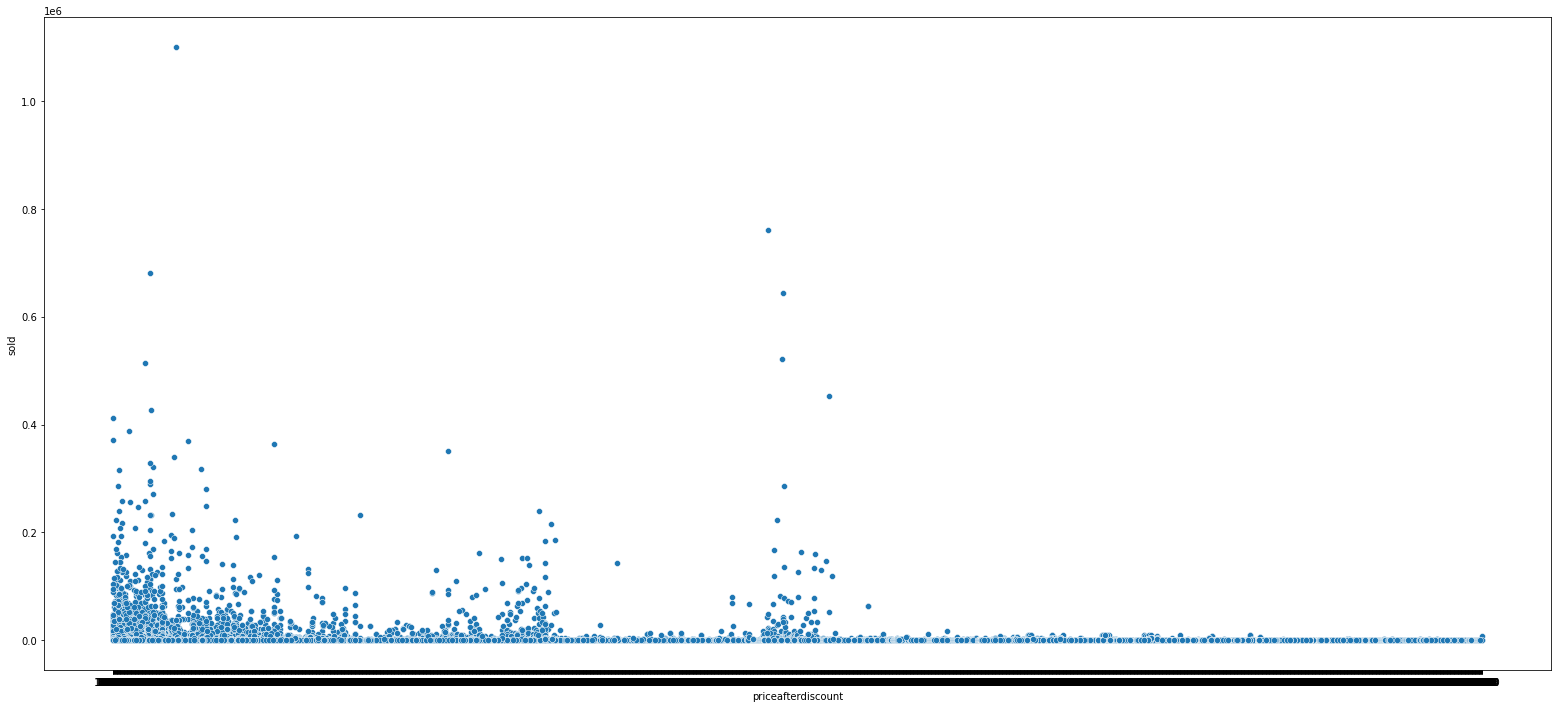

In [ ]:
#biểu đồ thể hiện mối quan hệ giữa  sold và price
# dataPriceDiscount = df[["priceafterdiscount","sold"]]
figPD, axPD = plt.subplots(figsize=(27,12)) 
sns.scatterplot(y='sold',x='priceafterdiscount', data=df,ax=axPD)

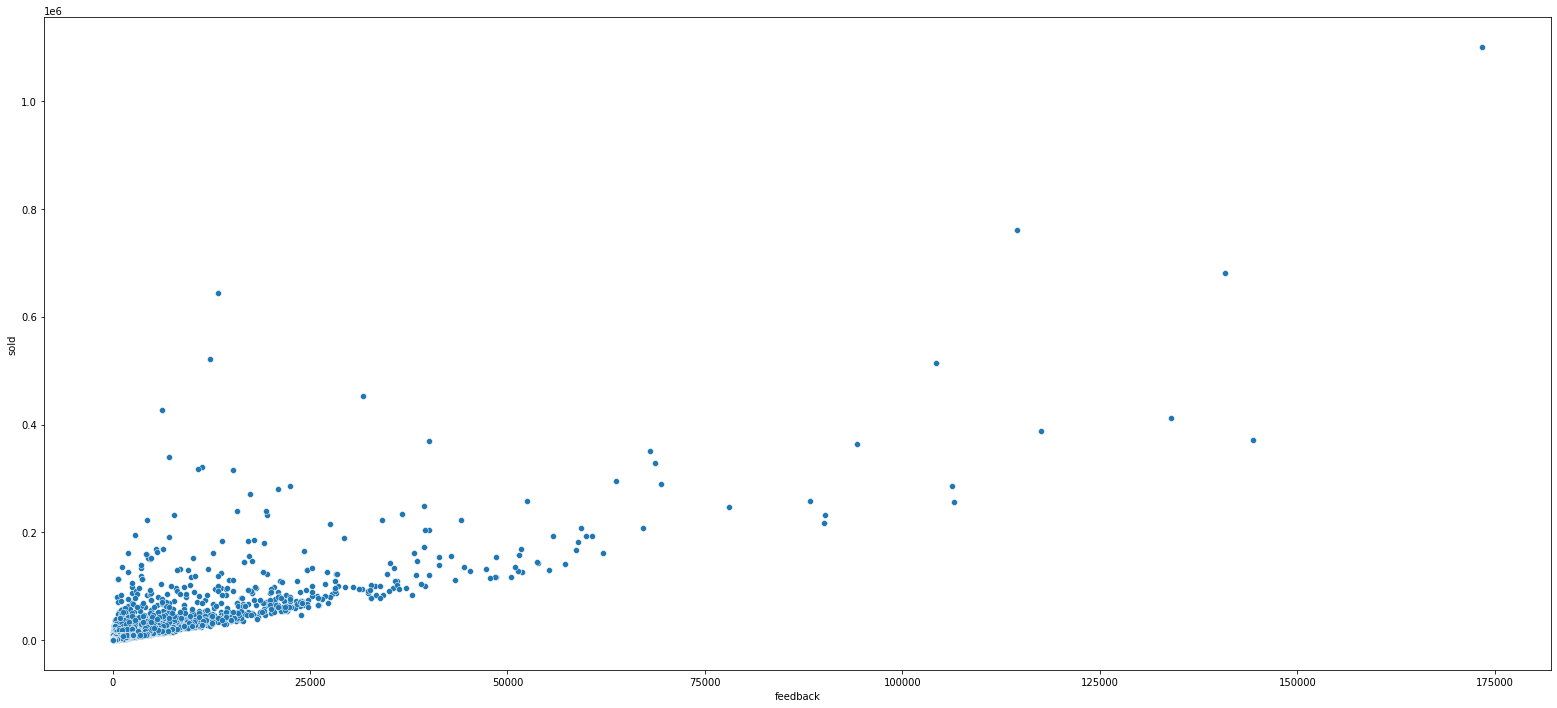

In [ ]:
#biểu đồ thể hiện mối quan hệ giữa  sold và feedback
# dataPriceDiscount = df[["priceafterdiscount","sold"]]
figPD, axPD = plt.subplots(figsize=(27,12)) 
sns.scatterplot(x='feedback',y='sold', data=df,ax=axPD)

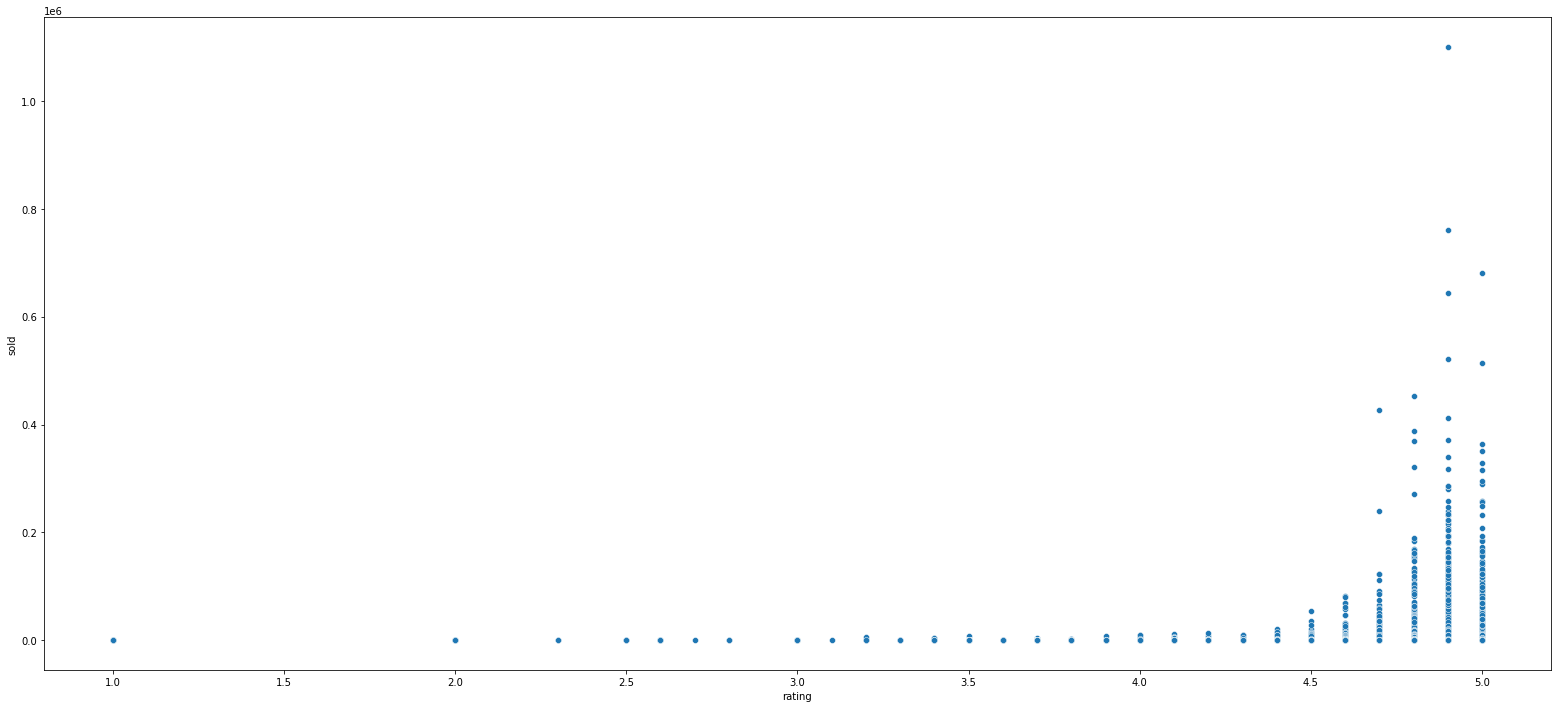

In [ ]:
#biểu đồ thể hiện mối quan hệ giữa  sold và rating
# dataPriceDiscount = df[["priceafterdiscount","sold"]]
figPD, axPD = plt.subplots(figsize=(27,12)) 
sns.scatterplot(x='rating',y='sold', data=df,ax=axPD)

In [ ]:
# calulate mean
mean = df[["sold","rating","feedback","discount"]].mean(axis = 0)
print(mean)
print(mean[0],mean[1],mean[2],mean[3])

sold        3329.297739
rating         4.847967
feedback     710.255341
discount      26.790700
dtype: float64
3329.29773898205 4.84796705280084 710.2553407934893 26.790699963902473


In [ ]:
#Phân cụm dữ liệu thành 3 cụm: bán chạy, bình thường, bán không chạy
dataKmeans = df[["sold","rating","feedback","discount"]]
dataKmeans["discount"] = dataKmeans["discount"]/mean[3]
dataKmeans["rating"] = dataKmeans["rating"]/mean[1]
dataKmeans["feedback"] = dataKmeans["feedback"]/mean[2]
dataKmeans["sold"] = dataKmeans["sold"]/mean[0]
print(dataKmeans)

            sold    rating   feedback  discount
0      12.074618  0.969479  16.191360  1.866319
1       1.652000  0.825088   0.050686  1.866319
2       1.742109  0.969479   2.111917  1.493055
3       0.540655  0.907597   0.810976  1.866319
4       1.291564  0.928224   1.689533  1.082465
...          ...       ...        ...       ...
30468   0.050461  0.990106   0.068989  1.717014
30469   0.064879  1.010733   0.087293  1.903646
30470   0.009912  0.948851   0.007040  0.895833
30471   0.012015  0.948851   0.056318  1.866319
30472   0.005407  1.010733   0.014079  1.605035

[30473 rows x 4 columns]


<ipython-input-27-e322c4d87384>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKmeans["discount"] = dataKmeans["discount"]/mean[3]
<ipython-input-27-e322c4d87384>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKmeans["rating"] = dataKmeans["rating"]/mean[1]
<ipython-input-27-e322c4d87384>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
kmeans = KMeans(n_clusters=3).fit(dataKmeans)
centroids = kmeans.cluster_centers_
print(centroids)
# fig = plt.figure(figsize=(27,12))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(dataKmeans['discount'], dataKmeans['rating'],dataKmeans["score"], zdir='z', c=  kmeans.labels_.astype(float))

# plt.scatter(dataKmeans['discount'], dataKmeans['rating'],dataKmeans["score"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
# plt.show()

[[  0.5204868    0.99984936   0.52576814   0.99604464]
 [122.68728483   1.01760868 121.4176016    1.25354445]
 [ 27.68374867   1.00953369  27.38591589   1.26197906]]


<class 'numpy.ndarray'>


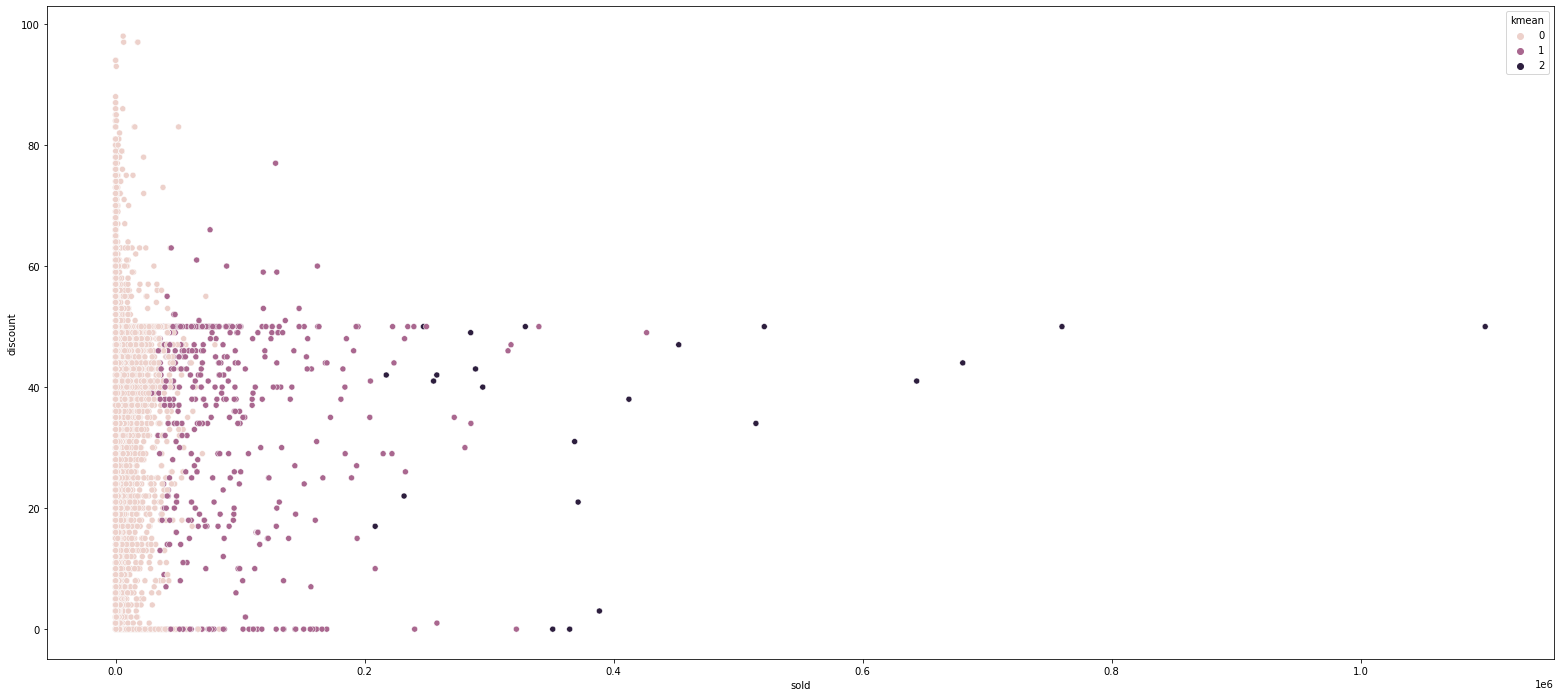

In [ ]:
result = kmeans.fit_predict(dataKmeans)
# print(type(result))
df['kmean'] = result.tolist()
figKmean, axKmean = plt.subplots(figsize=(27,12)) 
sns.scatterplot(x='sold',y='discount', data=df,ax=axKmean,hue="kmean")
# print("Price  Sold   Rating  Feedback   Discount  Kmean")
# for i in range(1000):
#   print(df["priceafterdiscount"][i],df["sold"][i],df["rating"][i],df["feedback"][i],df["discount"][i],df["kmean"][i])
